In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df_final = pd.read_csv('/applicant.csv')

In [6]:
df_final.shape

(1000, 15)

Now take some initial info

In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [9]:
df_final.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000


In [10]:
bool_col = df_final.select_dtypes(include=['bool']).columns.tolist()
num_col = df_final.select_dtypes(exclude=['object','bool']).columns.tolist()
cat_col = df_final.select_dtypes(include=['object']).columns.tolist()

In [11]:
print(len(bool_col),len(num_col),len(cat_col))

0 5 10


we can see there is lots of null value. First we check these columns are imp for prediction or not then we fix it on FE part.

In [13]:
df_final.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)'],
      dtype='object')

plotting bar chart for each categorical variable

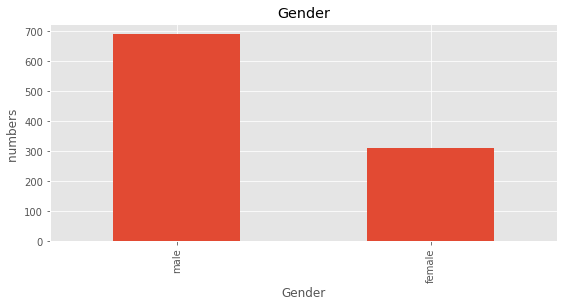

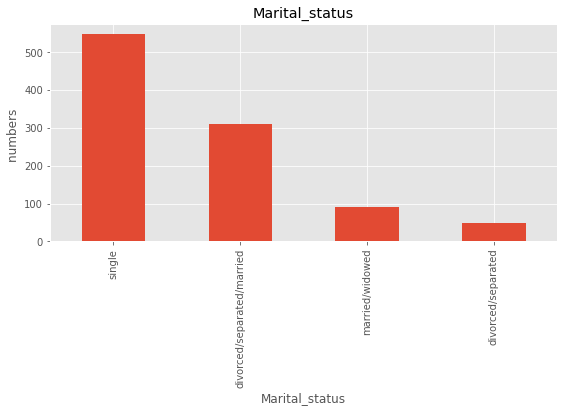

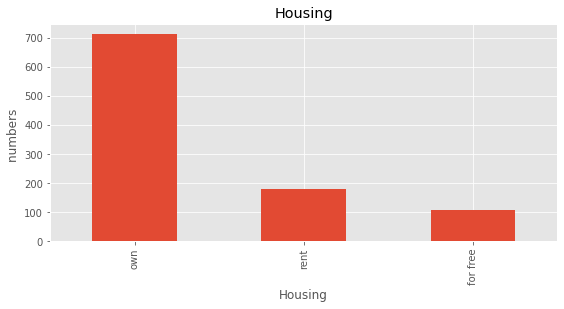

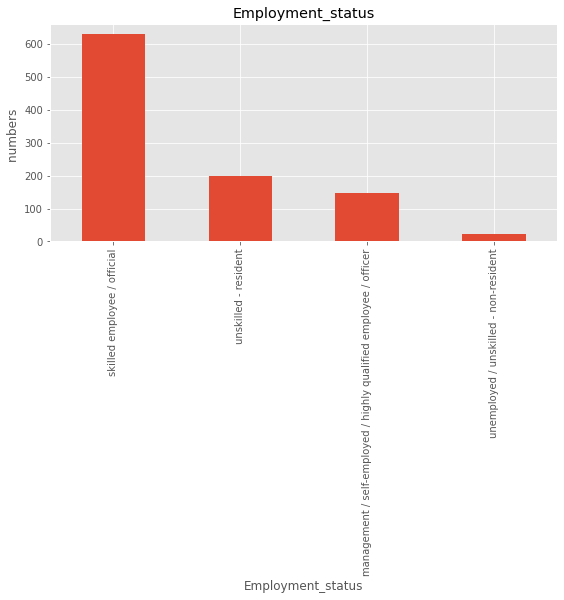

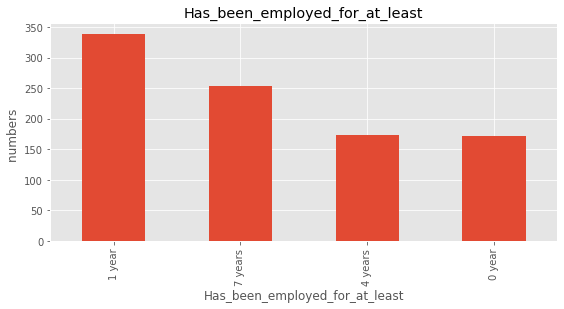

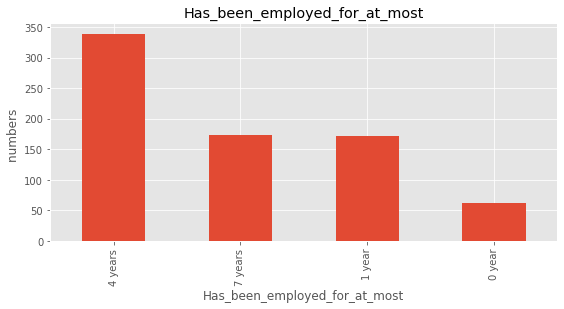

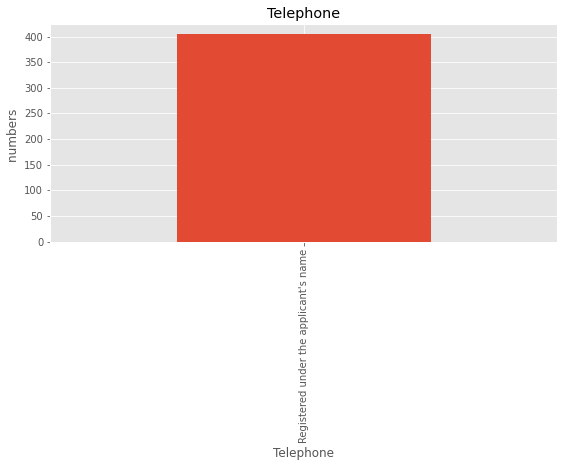

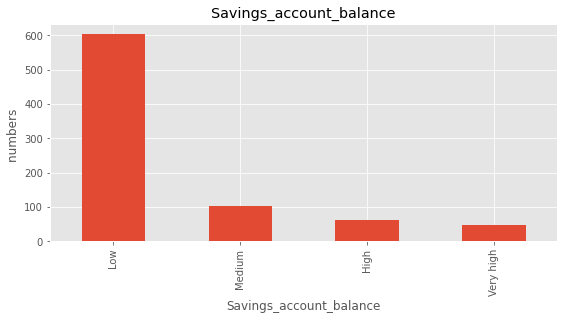

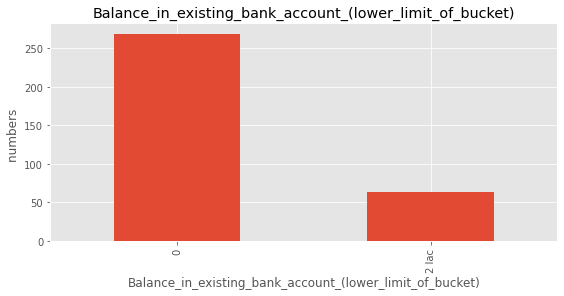

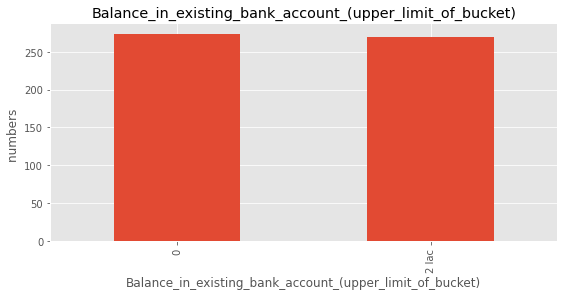

In [15]:
plt.style.use("ggplot")

for column in cat_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df_final[column].value_counts().plot(kind="bar")
    plt.xlabel(column)
    plt.ylabel("numbers ")
    plt.title(column)

plotting histogram for each numerical variable

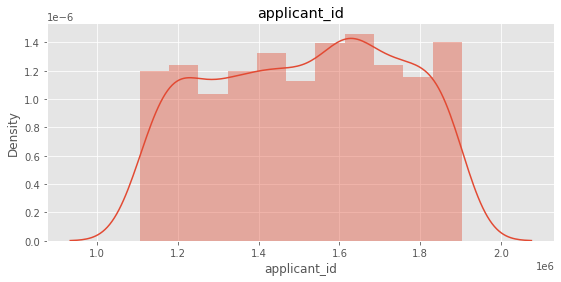

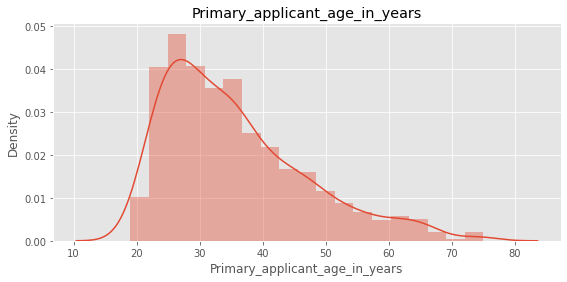

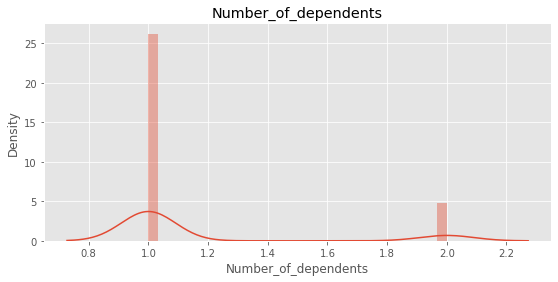

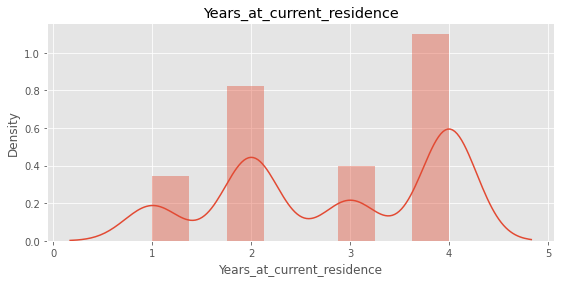

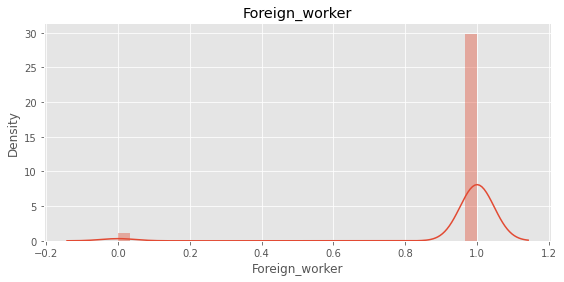

In [16]:
plt.style.use("ggplot")
for column in num_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.distplot(df_final[column], kde=True)
    plt.title(column)

In [17]:
#Loading loan csv for more understanding

In [18]:
df_ln = pd.read_csv('/loan.csv')

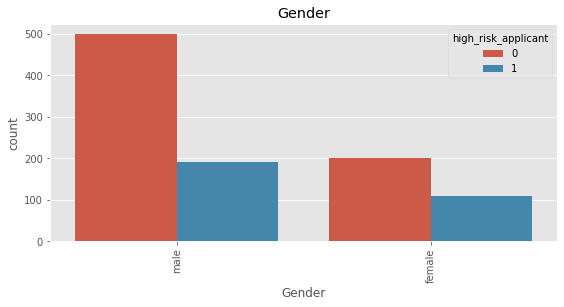

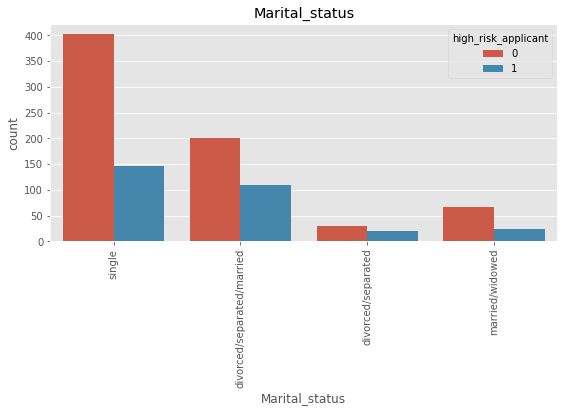

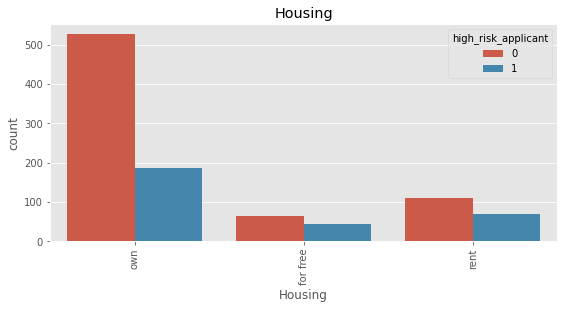

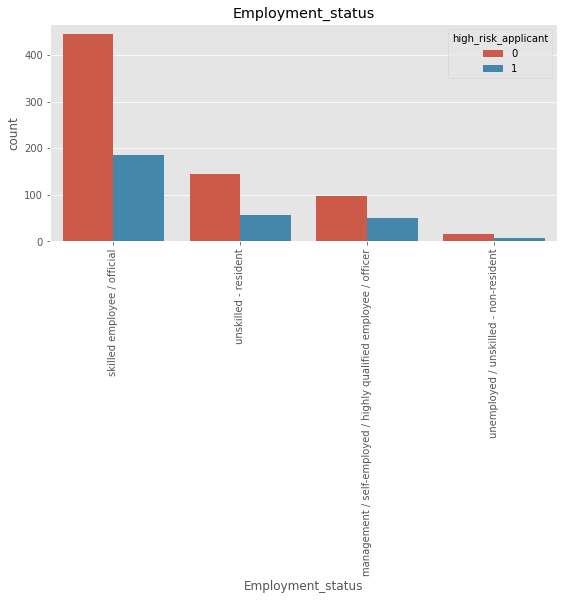

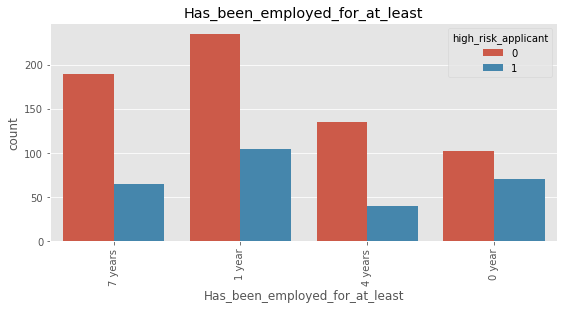

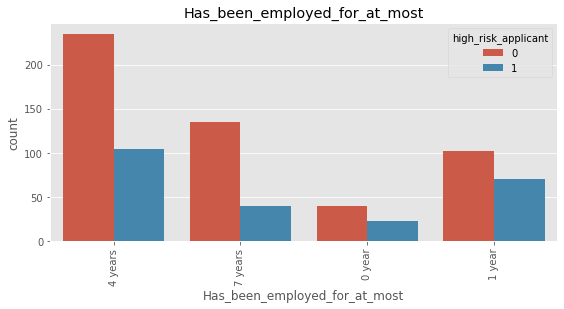

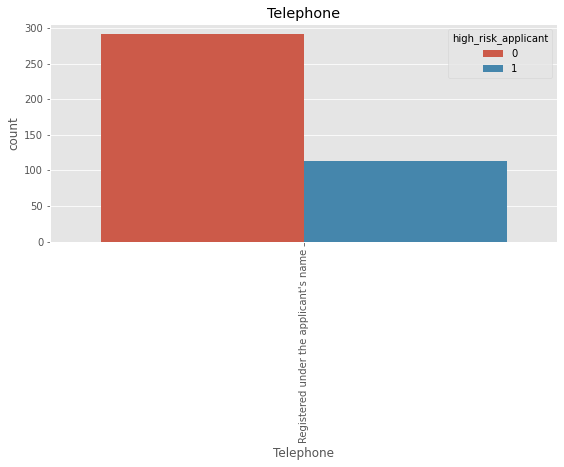

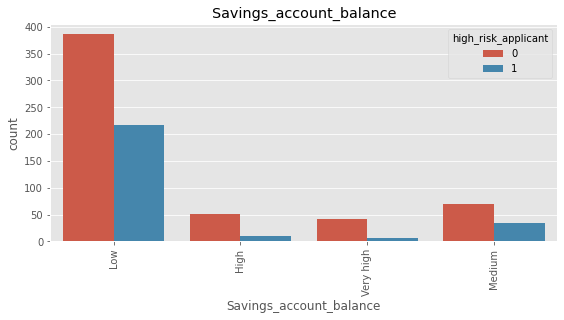

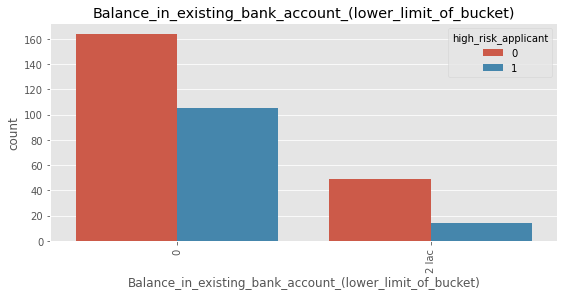

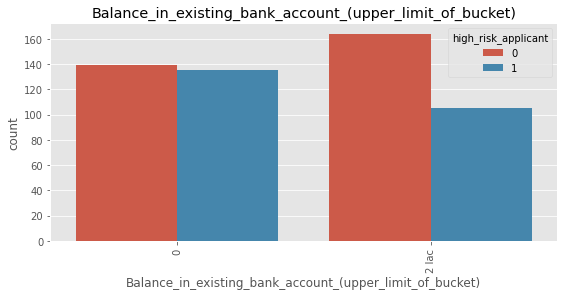

In [19]:
plt.style.use("ggplot")
for column in cat_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(df_final[column], hue=df_ln["high_risk_applicant"])
    plt.title(column)    
    plt.xticks(rotation=90)

In [20]:
df_final = pd.merge(df_final, df_ln ,on='applicant_id',  how='left')

Let's try to see which products they want to buy according to their ages and their quantities

Values describe: 
high_risk_applicant     0   1
Purpose                      
FF&E                  123  58
business               63  34
career development      8   1
domestic appliances     8   4
education              28  22
electronic equipment  218  62
new vehicle           145  89
repair costs           14   8
used vehicle           86  17


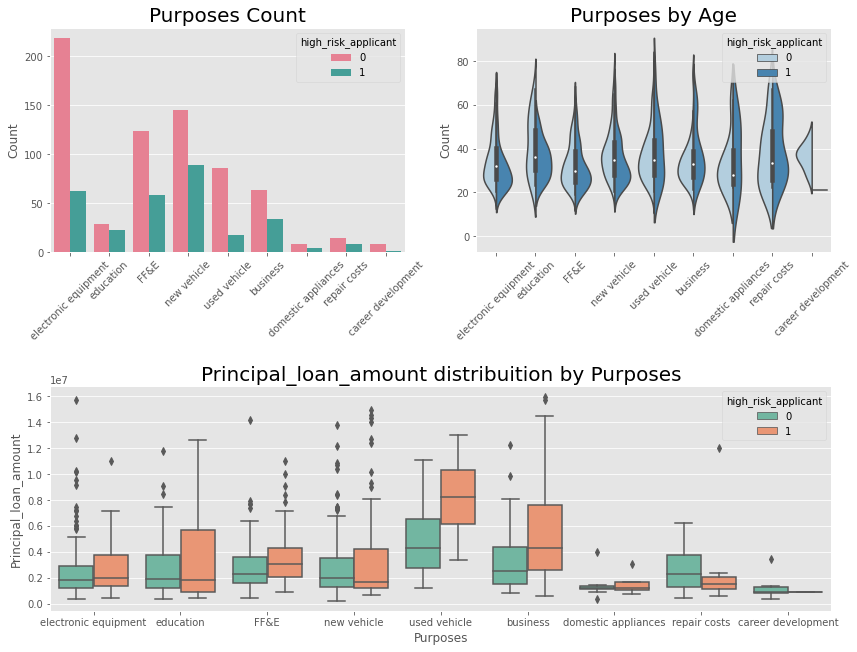

In [21]:
print("Values describe: ")
print(pd.crosstab(df_final.Purpose, df_final.high_risk_applicant))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="Purpose", data=df_final, 
              palette="husl", hue = "high_risk_applicant")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)

plt.subplot(222)
g1 = sns.violinplot(x="Purpose", y="Primary_applicant_age_in_years", data=df_final, palette="Blues", hue = "high_risk_applicant",split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Count", fontsize=12)
g1.set_title("Purposes by Age", fontsize=20)

plt.subplot(212)
g2 = sns.boxplot(x="Purpose", y="Principal_loan_amount", data=df_final, 
               palette="Set2", hue = "high_risk_applicant")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Principal_loan_amount", fontsize=12)
g2.set_title("Principal_loan_amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

In [22]:
df_0 = df_final[df_final["high_risk_applicant"]==0]
df_1 = df_final[df_final["high_risk_applicant"]==1]

Duration of the credits distribuition and density

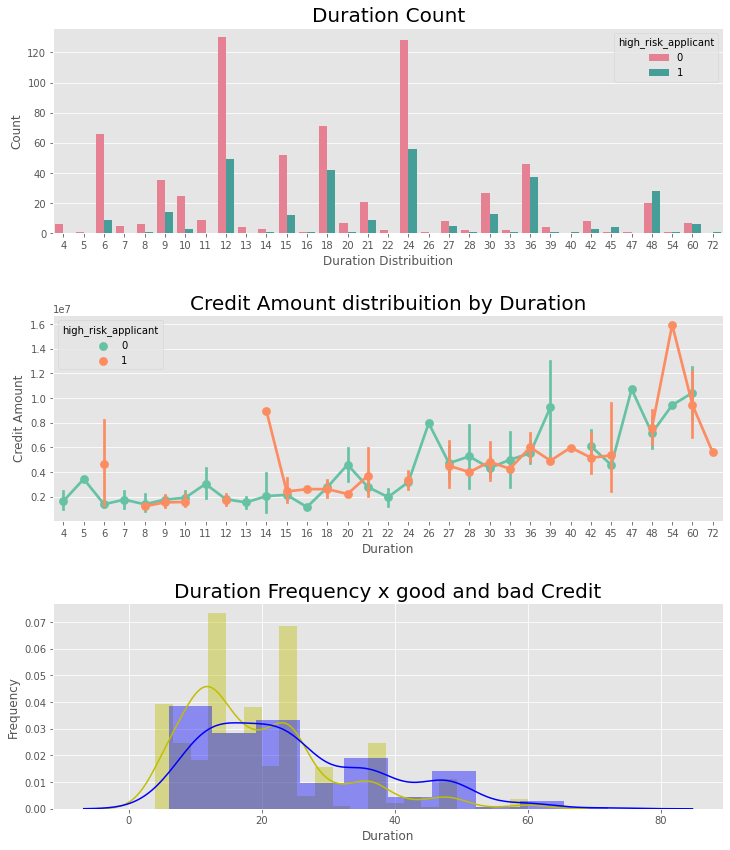

In [23]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="Months_loan_taken_for", data=df_final, 
              palette="husl",  hue = "high_risk_applicant")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="Months_loan_taken_for", y ="Principal_loan_amount",data=df_final,
                   hue="high_risk_applicant", palette="Set2")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_0["Months_loan_taken_for"], color='y')
g2 = sns.distplot(df_1["Months_loan_taken_for"], color='b')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration Frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

Now let's try to perform a merge between variables according to the above.



Total values of the most missing variable: 
Savings_account_balance
High          63
Low          603
Medium       103
Very high     48
Name: Savings_account_balance, dtype: int64


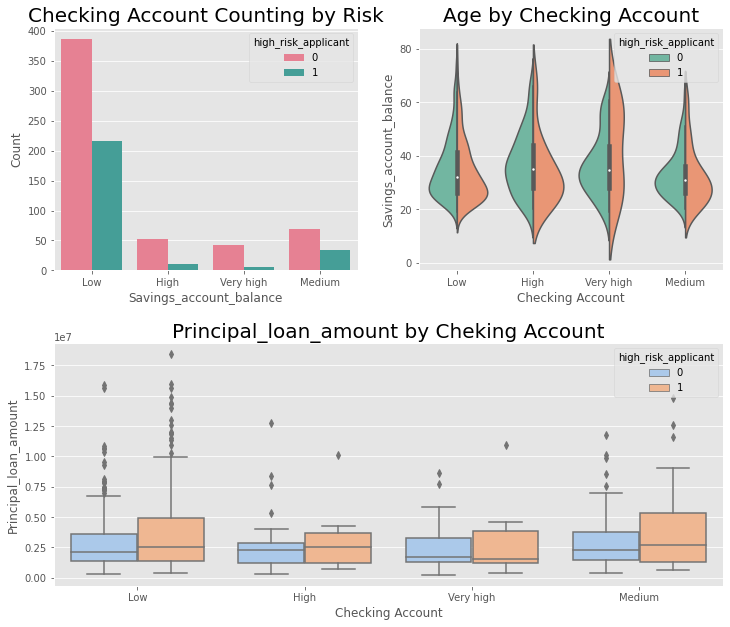

In [24]:
print("Total values of the most missing variable: ")
print(df_final.groupby("Savings_account_balance")["Savings_account_balance"].count())

plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Savings_account_balance", data=df_final, 
              palette="husl", hue="high_risk_applicant")
g.set_xlabel("Savings_account_balance", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Checking Account Counting by Risk", fontsize=20)

g1 = plt.subplot(222)
g1 = sns.violinplot(x="Savings_account_balance", y="Primary_applicant_age_in_years", data=df_final, palette="Set2", hue = "high_risk_applicant",split=True)
g1.set_xlabel("Checking Account", fontsize=12)
g1.set_ylabel("Savings_account_balance", fontsize=12)
g1.set_title("Age by Checking Account", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="Savings_account_balance",y="Principal_loan_amount", data=df_final,hue='high_risk_applicant',palette="pastel")
g2.set_xlabel("Checking Account", fontsize=12)
g2.set_ylabel("Principal_loan_amount", fontsize=12)
g2.set_title("Principal_loan_amount by Cheking Account", fontsize=20)

plt.subplots_adjust(wspace = 0.2, hspace = 0.3, top = 0.9)

plt.show()
plt.show()

The distribution of having a Number_of_dependents

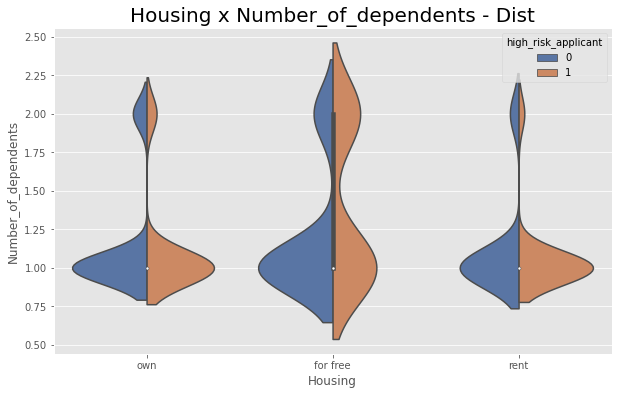

In [27]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Housing",y="Number_of_dependents",data=df_final,
                   hue="high_risk_applicant", palette="deep", as_cmap=True, split=True)
g.set_xlabel("Housing", fontsize=12)
g.set_ylabel("Number_of_dependents", fontsize=12)
g.set_title("Housing x Number_of_dependents - Dist", fontsize=20)

plt.show()

Text(0.5, 1.0, 'high_risk_applicant')

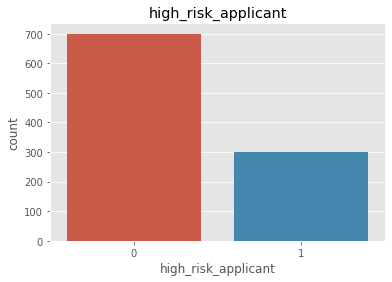

In [28]:
sns.countplot(df_final["high_risk_applicant"])
plt.title("high_risk_applicant")

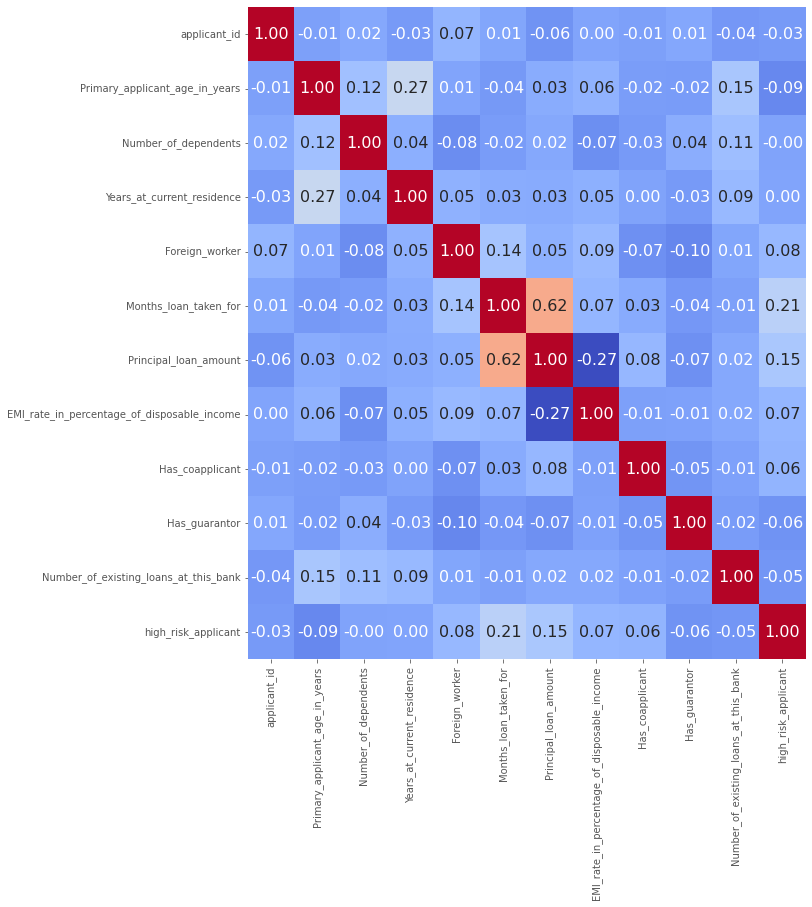

In [32]:
plt.figure(figsize=(10,12))
sns.heatmap(df_final.corr(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            annot_kws={'size':16},
            cbar=False)